In [2]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading the dataset
from google.colab import files
uploaded = files.upload()

# Reading the dataset (replace 'weather-data.csv' with the uploaded file's name)
data = pd.read_csv("/content/drive/MyDrive/training_data_with_weather_info_week_1.csv")

# Display the first few rows of the dataset
print(data.head())

# Basic information about the dataset
print(data.info())

Saving training_data_with_weather_info_week_1.csv to training_data_with_weather_info_week_1.csv
   Id Province/State Country/Region   Lat  Long        Date  ConfirmedCases  \
0   1            NaN    Afghanistan  33.0  65.0  2020-01-22             0.0   
1   2            NaN    Afghanistan  33.0  65.0  2020-01-23             0.0   
2   3            NaN    Afghanistan  33.0  65.0  2020-01-24             0.0   
3   4            NaN    Afghanistan  33.0  65.0  2020-01-25             0.0   
4   5            NaN    Afghanistan  33.0  65.0  2020-01-26             0.0   

   Fatalities  day_from_jan_first  temp   min   max    stp     slp  dewp  \
0         0.0                  22  42.6  33.6  54.9  999.9  1024.3  27.4   
1         0.0                  23  42.0  32.7  55.9  999.9  1020.8  22.8   
2         0.0                  24  40.1  36.9  43.2  999.9  1018.6  34.5   
3         0.0                  25  46.0  37.9  56.3  999.9  1018.0  37.8   
4         0.0                  26  42.8  36.1  53

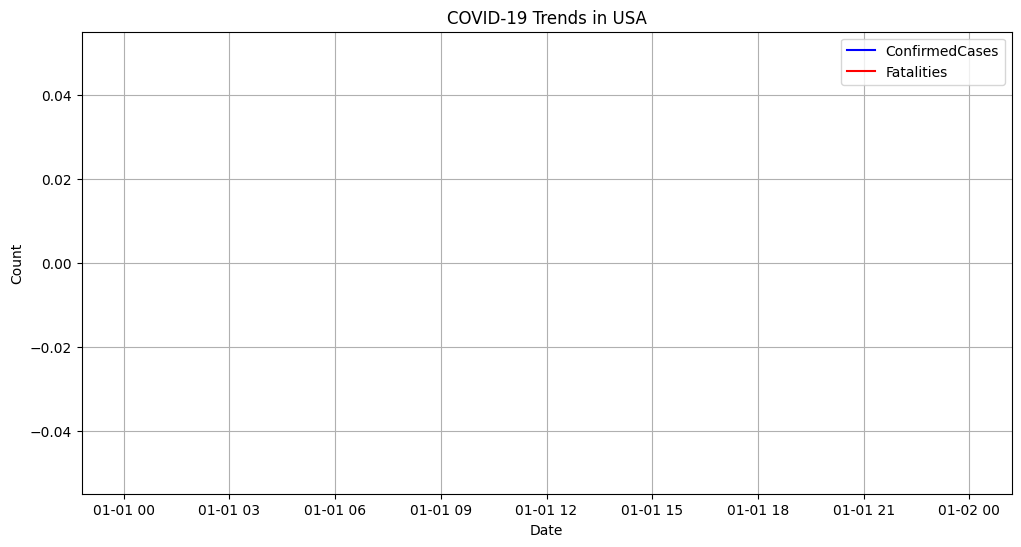

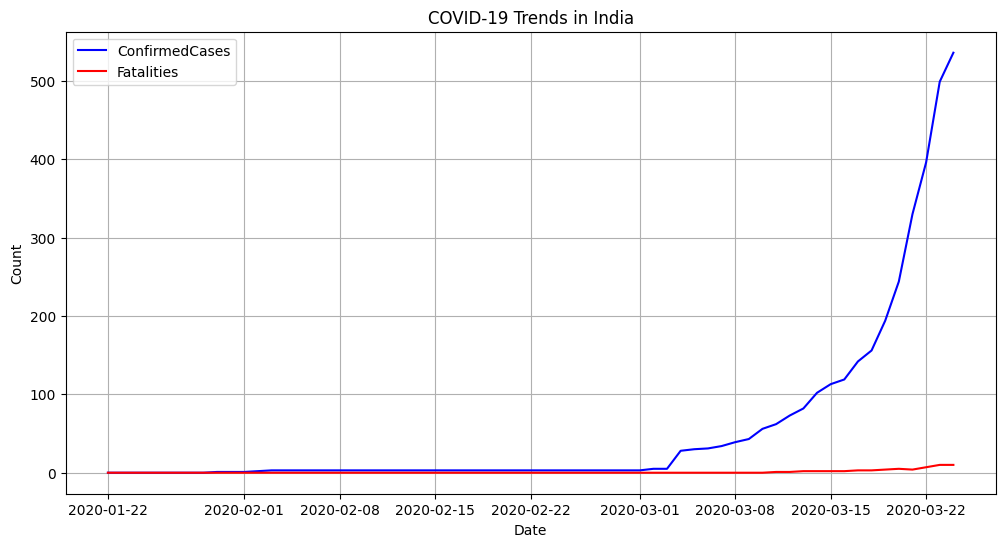

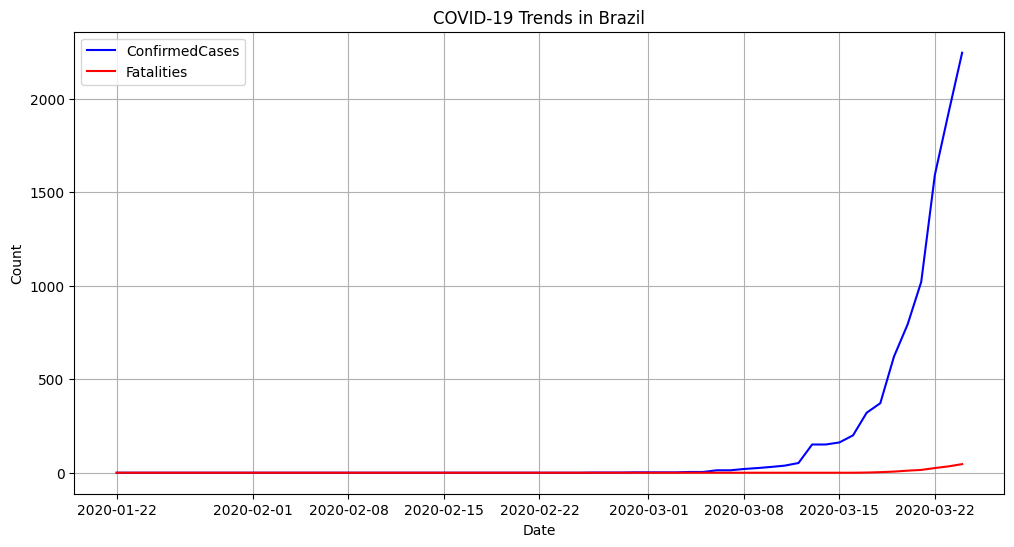

In [10]:
# Convert the date column to datetime for easier handling
data['Date'] = pd.to_datetime(data['Date'])

# Group data by date and region to calculate daily confirmed cases and fatalities
time_region_data = data.groupby(['Date', 'Country/Region'])[['ConfirmedCases', 'Fatalities']].sum().reset_index()

# Plotting the trends for a few selected regions
regions_to_plot = ['USA', 'India', 'Brazil']
for region in regions_to_plot:
    region_data = time_region_data[time_region_data['Country/Region'] == region]
    plt.figure(figsize=(12, 6))
    plt.plot(region_data['Date'], region_data['ConfirmedCases'], label='ConfirmedCases', color='blue')
    plt.plot(region_data['Date'], region_data['Fatalities'], label='Fatalities', color='red')
    plt.title(f"COVID-19 Trends in {region}")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.legend()
    plt.grid()
    plt.show()

Regions with Highest Confirmed Cases:
     Country/Region  ConfirmedCases  Fatalities
29           China       3500461.0    121046.0
75           Italy        571924.0     46856.0
71            Iran        278992.0     16870.0
139          Spain        232453.0     12464.0
154             US        219412.0      2972.0

Regions with Lowest Confirmed Cases:
    Country/Region  ConfirmedCases  Fatalities
7           Aruba             0.0         0.0
25       Cameroon             0.0         0.0
36    Cruise Ship             0.0         0.0
39        Czechia             0.0         0.0
51  French Guiana             0.0         0.0

Regions with Highest Fatalities:
     Country/Region  ConfirmedCases  Fatalities
29           China       3500461.0    121046.0
75           Italy        571924.0     46856.0
71            Iran        278992.0     16870.0
139          Spain        232453.0     12464.0
50          France        122701.0      3721.0

Regions with Lowest Fatalities:
          Coun

<ipython-input-12-fa210c804b18>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='ConfirmedCases', data=highest_cases, palette='viridis')


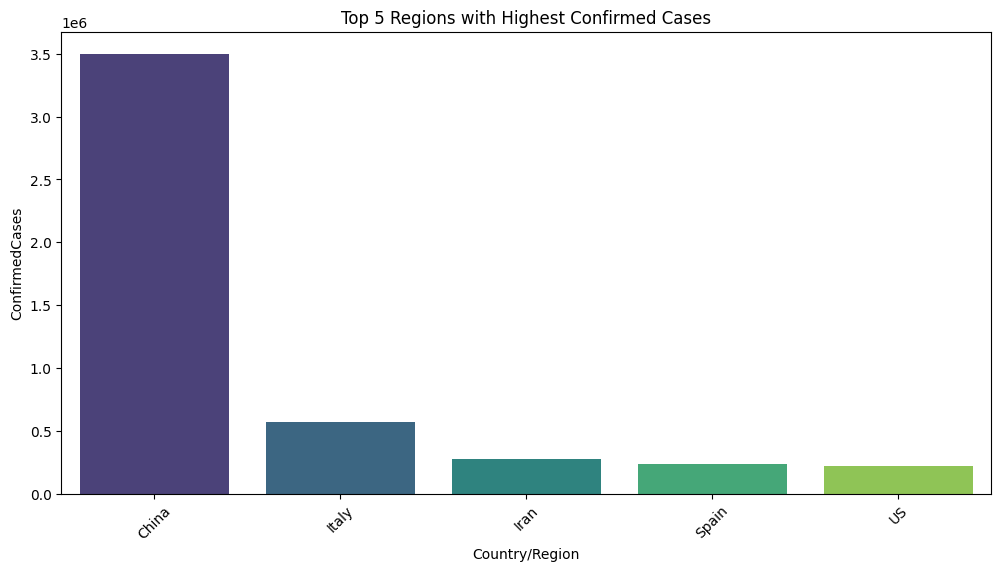

In [12]:
# Group data by region to calculate total confirmed cases and fatalities
region_totals = data.groupby('Country/Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()

# Sort regions by confirmed cases and fatalities
highest_cases = region_totals.nlargest(5, 'ConfirmedCases')
lowest_cases = region_totals.nsmallest(5, 'ConfirmedCases')
highest_fatalities = region_totals.nlargest(5, 'Fatalities')
lowest_fatalities = region_totals.nsmallest(5, 'Fatalities')

# Displaying the results
print("Regions with Highest Confirmed Cases:\n", highest_cases)
print("\nRegions with Lowest Confirmed Cases:\n", lowest_cases)
print("\nRegions with Highest Fatalities:\n", highest_fatalities)
print("\nRegions with Lowest Fatalities:\n", lowest_fatalities)

# Visualizing the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='ConfirmedCases', data=highest_cases, palette='viridis')
plt.title("Top 5 Regions with Highest Confirmed Cases")
plt.xlabel("Country/Region")
plt.ylabel("ConfirmedCases")
plt.xticks(rotation=45)
plt.show()

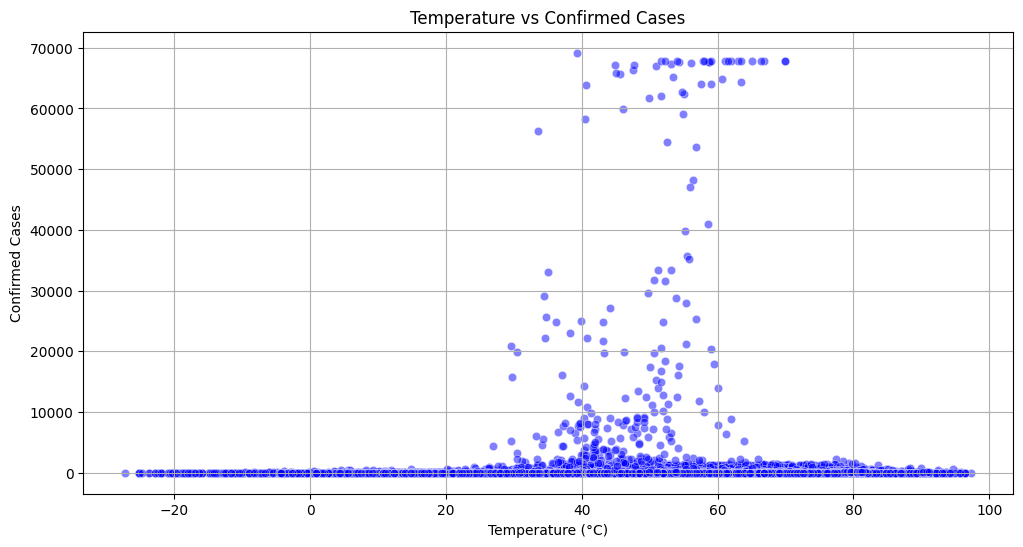

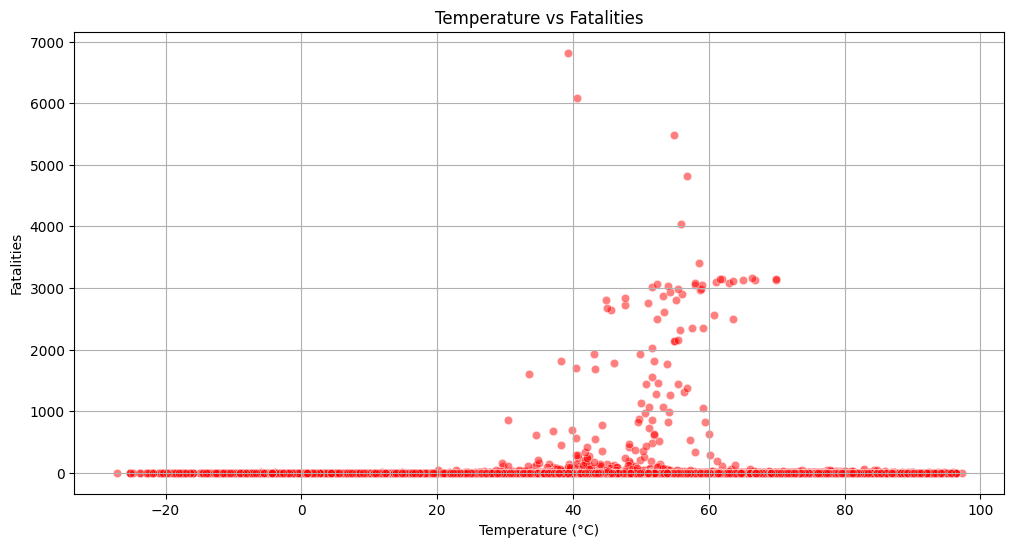

Correlation between Temperature and Confirmed Cases: -0.01
Correlation between Temperature and Fatalities: -0.01


In [13]:
# Scatter plot for temperature vs confirmed cases
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temp', y='ConfirmedCases', alpha=0.5, color='blue')
plt.title("Temperature vs Confirmed Cases")
plt.xlabel("Temperature (°C)")
plt.ylabel("Confirmed Cases")
plt.grid()
plt.show()

# Scatter plot for temperature vs fatalities
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='temp', y='Fatalities', alpha=0.5, color='red')
plt.title("Temperature vs Fatalities")
plt.xlabel("Temperature (°C)")
plt.ylabel("Fatalities")
plt.grid()
plt.show()

# Calculating correlation
temp_corr_cases = data['temp'].corr(data['ConfirmedCases'])
temp_corr_fatalities = data['temp'].corr(data['Fatalities'])

print(f"Correlation between Temperature and Confirmed Cases: {temp_corr_cases:.2f}")
print(f"Correlation between Temperature and Fatalities: {temp_corr_fatalities:.2f}")
